## Decima Clase, Análisis de Regresion. UNAM Acatlan

## Estimación de parámetros, parte II, III

In [1]:
pip install faraway

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 1.8 MB/s eta 0:00:00


In [2]:
###########################################
###Importamos librerias de interes      ###
###########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import faraway.utils

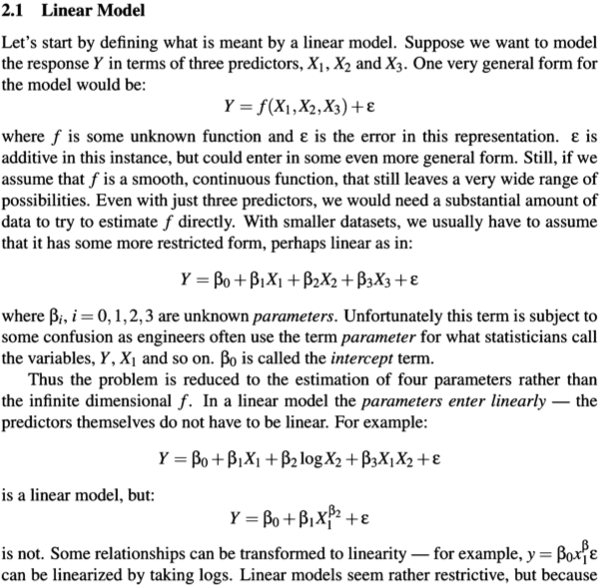

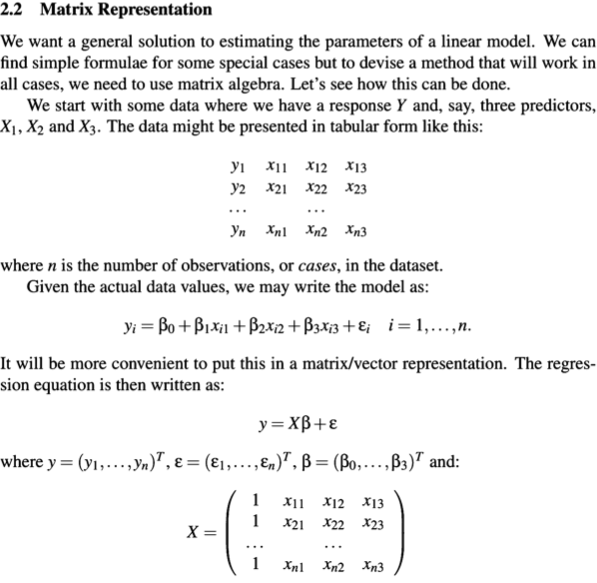

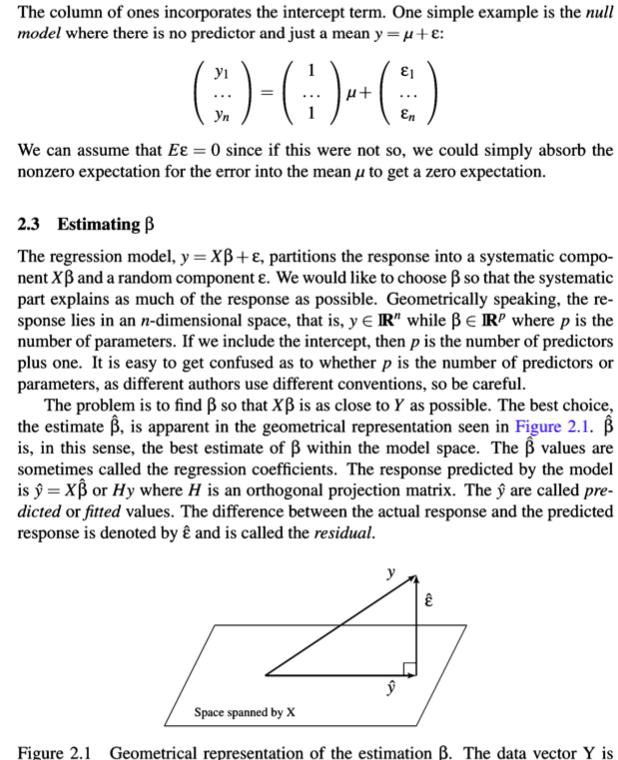

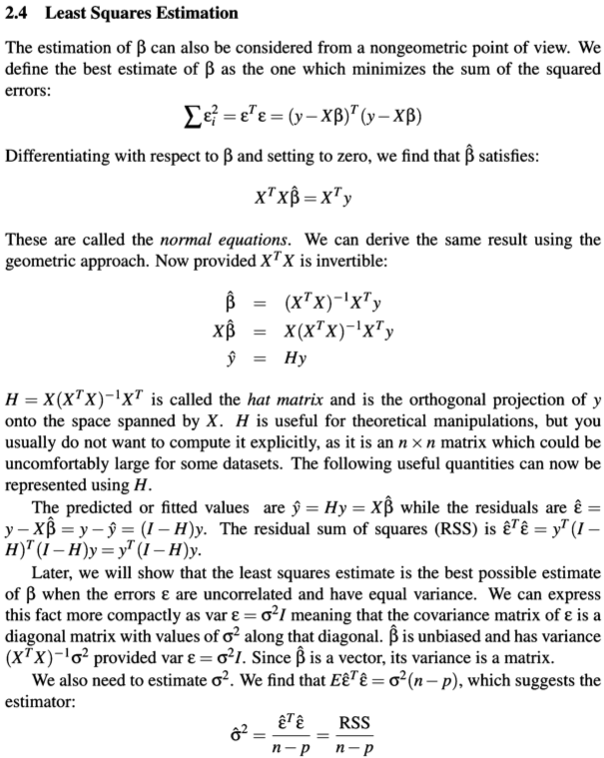

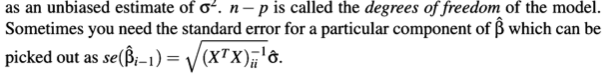

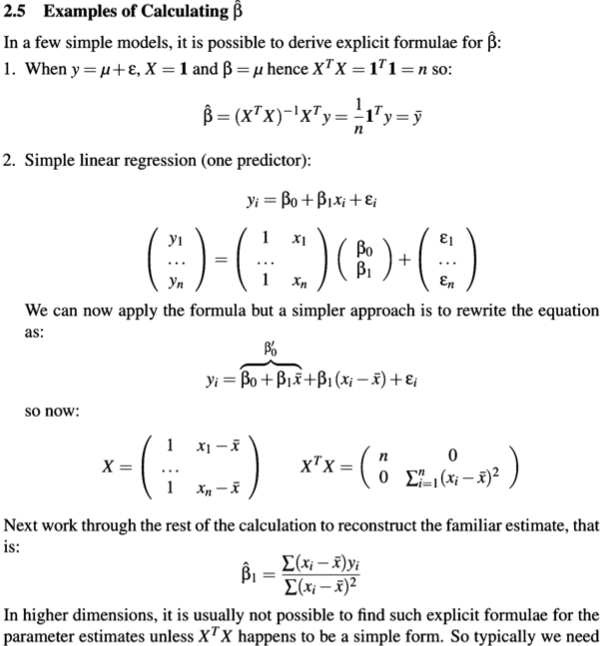

# Ejemplo práctico

In [3]:
import faraway.datasets.galapagos
galapagos = faraway.datasets.galapagos.load()
galapagos.head(10)

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82
Daphne.Major,18,0.34,119,8.0,8.0,1.84
Daphne.Minor,24,0.08,93,6.0,12.0,0.34
Darwin,10,2.33,168,34.1,290.2,2.85
Eden,8,0.03,71,0.4,0.4,17.95
Enderby,2,0.18,112,2.6,50.2,0.10


In [4]:
print(faraway.datasets.galapagos.DESCR)


Species diversity on the Galapagos Islands

Description

There are 30 Galapagos islands and 7 variables in the dataset. The relationship between the number of plant species and several geographic variables is of interest. The original dataset contained several missing values which have been filled for convenience.

Usage

data(gala)
Format

The dataset contains the following variables

Species
the number of plant species found on the island

Area
the area of the island (km$^2$)

Elevation
the highest elevation of the island (m)

Nearest
the distance from the nearest island (km)

Scruz
the distance from Santa Cruz island (km)

Adjacent
the area of the adjacent island (square km)

Source

M. P. Johnson and P. H. Raven (1973) "Species number and endemism: The Galapagos Archipelago revisited" Science, 179, 893-895



In [5]:
galapagos.describe()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,85.233333,261.708667,368.033333,10.060000,56.976667,261.098333
std,114.633053,864.110519,421.604937,14.274636,68.032334,864.518967
min,2.000000,0.010000,25.000000,0.200000,0.000000,0.030000
25%,13.000000,0.257500,97.750000,0.800000,11.025000,0.520000
50%,42.000000,2.590000,192.000000,3.050000,46.650000,2.590000
75%,96.000000,59.237500,435.250000,10.025000,81.075000,59.237500
max,444.000000,4669.320000,1707.000000,47.400000,290.200000,4669.320000


In [6]:
## Generamos un modelo con OLS

lmod = smf.ols(formula='Species ~ Area + Elevation + Nearest + Scruz + Adjacent', data=galapagos).fit()
lmod.params

Intercept    7.068221
Area        -0.023938
Elevation    0.319465
Nearest      0.009144
Scruz       -0.240524
Adjacent    -0.074805
dtype: float64

In [7]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           6.84e-07
Time:                        02:29:28   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.7

<Axes: >

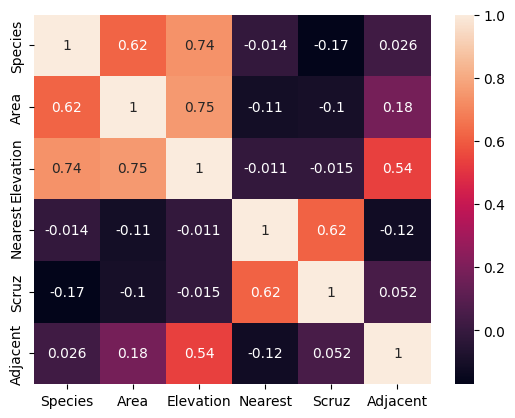

In [10]:
sns.heatmap(galapagos.corr(),annot=True)

In [11]:
## Importamos una versión más corta del summary
import faraway.utils
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [14]:
galapagos.head(5)

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


In [19]:
## Tomamos las variables desde la posición uno para construir la matriz X
X = galapagos.iloc[:,1:]
X.head(5)

,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,25.09,346,0.6,0.6,1.84
Bartolome,1.24,109,0.6,26.3,572.33
Caldwell,0.21,114,2.8,58.7,0.78
Champion,0.10,46,1.9,47.4,0.18
Coamano,0.05,77,1.9,1.9,903.82


In [20]:
X.insert(0, 'intercept', 1)
X.head(5)

,intercept,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,1,25.09,346,0.6,0.6,1.84
Bartolome,1,1.24,109,0.6,26.3,572.33
Caldwell,1,0.21,114,2.8,58.7,0.78
Champion,1,0.10,46,1.9,47.4,0.18
Coamano,1,0.05,77,1.9,1.9,903.82


In [21]:
## Calculamos la inversa de. (XtX)^-1

XtXi = np.linalg.inv(X.T @ X)

In [22]:
print(XtXi)

[[ 9.86782947e-02  3.77824206e-05 -1.56197594e-04 -2.33902749e-04
  -3.76029344e-04  2.30983215e-05]
 [ 3.77824206e-05  1.35224686e-07 -2.59361691e-07  1.29400287e-06
  -4.91314864e-08  4.62030303e-08]
 [-1.56197594e-04 -2.59361691e-07  7.74533893e-07 -3.54936610e-06
   3.08083062e-07 -1.64024092e-07]
 [-2.33902749e-04  1.29400287e-06 -3.54936610e-06  2.98873182e-04
  -3.82107736e-05  1.42472881e-06]
 [-3.76029344e-04 -4.91314864e-08  3.08083062e-07 -3.82107736e-05
   1.24794132e-05 -1.95835559e-07]
 [ 2.30983215e-05  4.62030303e-08 -1.64024092e-07  1.42472881e-06
  -1.95835559e-07  8.42654317e-08]]


In [23]:
## Calculamos el vector de Betas=(XtX)^-1 Xt Y

(XtXi @ X.T) @ galapagos.Species

0    7.068221
1   -0.023938
2    0.319465
3    0.009144
4   -0.240524
5   -0.074805
dtype: float64

In [24]:
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [25]:
(XtXi @ X.T)

,Baltra,Bartolome,Caldwell,Champion,Coamano,Daphne.Major,Daphne.Minor,Darwin,Eden,Enderby,...,Las.Plazas,Rabida,SanCristobal,SanSalvador,SantaCruz,SantaFe,SantaMaria,Seymour,Tortuga,Wolf
0,0.045258,0.084890,0.058170,0.073233,0.106371,0.075267,0.078247,-0.044509,0.087760,0.061708,...,0.084241,0.044554,-0.027920,-0.028592,-0.002256,0.049081,-0.013937,7.261608e-02,0.049357,-0.044429
1,-0.000048,0.000036,0.000009,0.000026,0.000062,0.000017,0.000021,0.000025,0.000021,0.000010,...,0.000015,-0.000026,-0.000018,-0.000120,-0.000063,-0.000006,-0.000104,1.369039e-06,-0.000003,0.000004
2,0.000103,-0.000160,-0.000060,-0.000113,-0.000251,-0.000090,-0.000102,-0.000059,-0.000105,-0.000063,...,-0.000089,0.000025,0.000115,0.000402,0.000276,-0.000015,0.000301,-4.610572e-05,-0.000024,-0.000004
3,-0.001270,-0.000629,-0.002043,-0.001640,0.001276,0.001432,0.000771,-0.001720,-0.000356,-0.001772,...,-0.000405,-0.000332,0.008904,-0.003399,-0.001951,0.003180,-0.003387,-9.050317e-04,-0.000779,-0.000666
4,-0.000286,-0.000149,0.000284,0.000157,-0.000578,-0.000546,-0.000427,0.001994,-0.000368,0.000186,...,-0.000364,-0.000239,-0.001079,0.000113,-0.000177,-0.000722,0.000327,-2.388691e-04,0.000053,0.001577
5,-0.000032,0.000049,-0.000003,0.000009,0.000089,0.000014,0.000014,-0.000012,0.000013,-0.000001,...,0.000010,0.000013,-0.000017,-0.000102,-0.000076,0.000002,-0.000080,1.608292e-07,-0.000006,-0.000019


In [26]:
## Una alternativa más elegante y eficiente
## Recuerdan como resolvimos el sistema en la clase anterior?

np.linalg.solve(X.T @ X, X.T @ galapagos.Species)

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [27]:
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [28]:
## Calculamos el error cuadrático medio

np.sqrt(lmod.mse_resid)

60.97518837269358

In [29]:
## Usando el método de la inversa de Moore-Penrose para matrices de rango completo

Xmp = np.linalg.pinv(X)
Xmp.shape

(6, 30)

In [30]:
X.shape

(30, 6)

In [32]:
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [31]:
## Obteniendo la inversa, podemos calcular el vector Beta

Xmp @ galapagos.Species

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

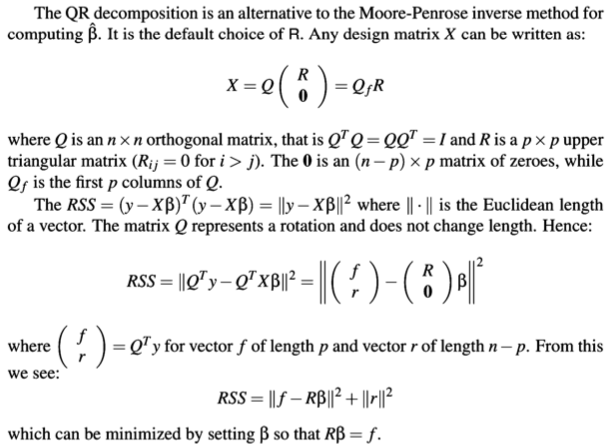

In [33]:
q, r = np.linalg.qr(X)

print(q)
print("----------")
print(r)

[[-1.82574186e-01 -5.08488004e-02  4.35527953e-02 -1.35199311e-01
  -1.03791936e-01  1.08866757e-01]
 [-1.82574186e-01 -5.59741099e-02 -1.09408998e-01 -1.18650937e-01
  -1.00779712e-02 -1.69519504e-01]
 [-1.82574186e-01 -5.61954545e-02 -1.05804074e-01 -9.01019504e-02
   8.00078418e-02  1.04424997e-02]
 [-1.82574186e-01 -5.62190932e-02 -1.51351349e-01 -9.68597570e-02
   5.13138673e-02 -3.09949805e-02]
 [-1.82574186e-01 -5.62298381e-02 -1.30562467e-01 -9.91883988e-02
  -1.07116637e-01 -3.06479596e-01]
 [-1.82574186e-01 -5.61675178e-02 -1.02485057e-01 -2.19781701e-02
  -1.48238297e-01 -4.67862754e-02]
 [-1.82574186e-01 -5.62233912e-02 -1.19846476e-01 -4.63839081e-02
  -1.13695067e-01 -4.84860375e-02]
 [-1.82574186e-01 -5.57398714e-02 -7.01351692e-02  3.18226444e-01
   5.66637074e-01  4.25724350e-02]
 [-1.82574186e-01 -5.62341361e-02 -1.34578807e-01 -1.18496602e-01
  -9.70951437e-02 -4.63617301e-02]
 [-1.82574186e-01 -5.62019014e-02 -1.07137103e-01 -9.25877517e-02
   5.25877614e-02  4.7618

In [34]:
## Calculamos f
f = q.T @ galapagos.Species
f

array([-466.84219318,  381.40557435,  256.25047255,    5.40764552,
       -119.49834019,  257.69436853])

In [35]:
## Ahora resolvemos la ecuación RB=f
sp.linalg.solve_triangular(r,f)

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [36]:
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [37]:
## Así mismo podemos solicitar a StarModels utilizar el método de QR

lmodform = smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz + Adjacent', data=galapagos
)

lmod=lmodform.fit(method="qr")

In [38]:
lmod.params

Intercept    7.068221
Area        -0.023938
Elevation    0.319465
Nearest      0.009144
Scruz       -0.240524
Adjacent    -0.074805
dtype: float64

In [39]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           6.84e-07
Time:                        03:14:08   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.7

In [40]:
### Usamos GOLS, Mínimos Cuadrados Generalizados

params, res, rnk, s = sp.linalg.lstsq(X, galapagos['Species'])
params

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [41]:
## Residuos

res

89231.36633005118

In [42]:
#Rango

rnk

6

In [43]:
## Singular values

s

array([6.04962889e+03, 4.22776213e+03, 1.49794382e+03, 4.09790365e+02,
       5.73910244e+01, 3.18334874e+00])

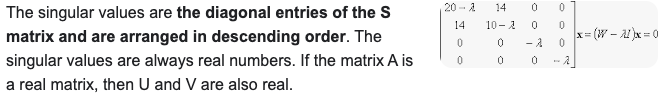

In [44]:
sp.linalg.lstsq(X, galapagos['Species'])

(array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
        -0.07480483]),
 89231.36633005118,
 6,
 array([6.04962889e+03, 4.22776213e+03, 1.49794382e+03, 4.09790365e+02,
        5.73910244e+01, 3.18334874e+00]))

In [ ]:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html

In [47]:
df_galapagos_numerical=galapagos.columns
df_galapagos_numerical

Index(['Species', 'Area', 'Elevation', 'Nearest', 'Scruz', 'Adjacent'], dtype='object')

<ipython-input-57-108a2c4cfe94>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(galapagos[i], bins=10,kde=True, ax=ax[r][c])
<ipython-input-57-108a2c4cfe94>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(galapagos[i], bins=10,kde=True, ax=ax[r][c])
<ipython-input-57-108a2c4cfe94>:12: UserWa

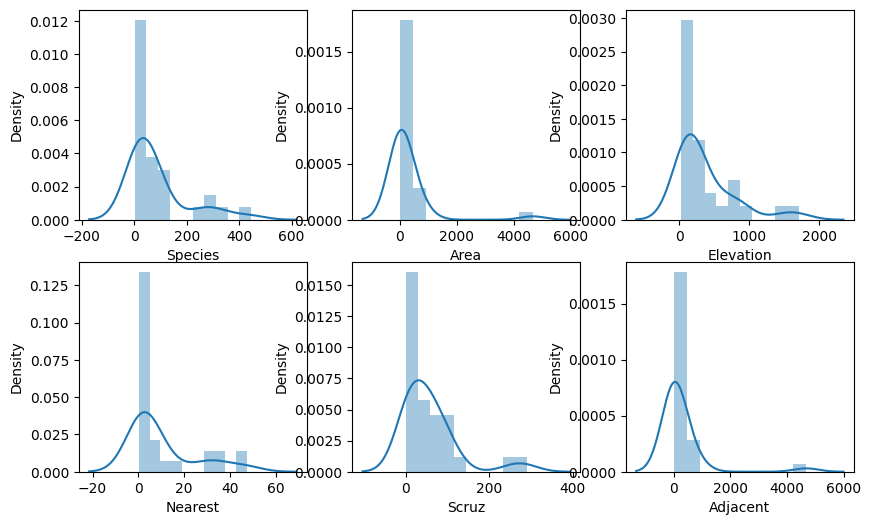

In [57]:
# plot a histogram for each of the features above

nrows = 2
ncols = 3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 6))

r = 0
c = 0

for i in df_galapagos_numerical:
  sns.distplot(galapagos[i], bins=10,kde=True, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

In [59]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           6.84e-07
Time:                        03:31:01   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.7

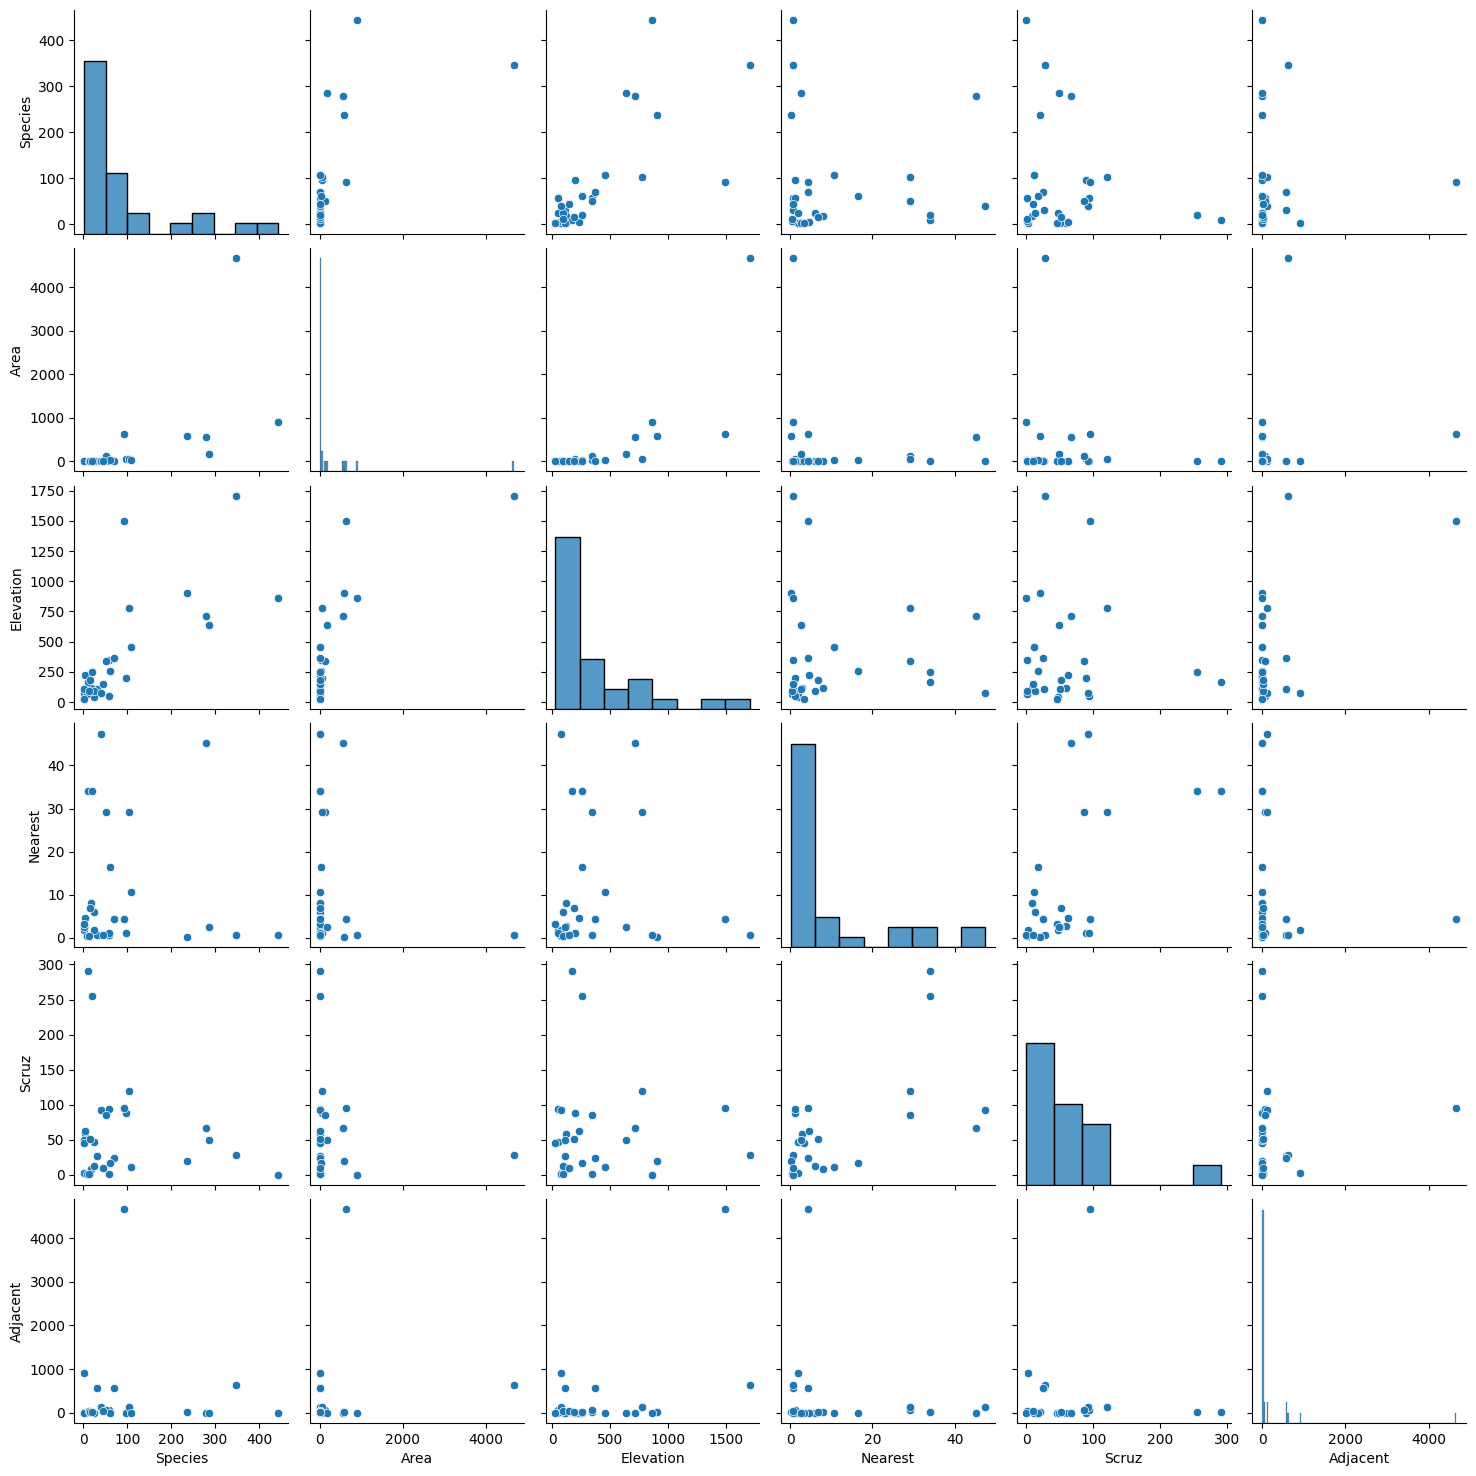

In [58]:
sns.pairplot(galapagos)